### Environmental Data Visualization and Analysis: 

### Global limate Change Patterns and Impacts

#### 1. Objective
- Thu thập và phân tích dữ liệu môi trường liên quan đến biến đổi khí hậu từ các nguồn toàn cầu đáng tin cậy.
- Phân tích xu hướng nhiệt độ, phát thải CO₂, và mối liên hệ giữa chúng qua thời gian.
- Tạo các biểu đồ trực quan, tương tác để thể hiện rõ ràng sự thay đổi môi trường và các mối tương quan.
- Xây dựng câu chuyện dữ liệu về tác động của biến đổi khí hậu ở các khu vực khác nhau.

#### 2. Lý do chọn đề tài
Biến đổi khí hậu là một trong những thách thức lớn nhất toàn cầu hiện nay. Việc trực quan hóa dữ liệu giúp truyền tải các xu hướng môi trường phức tạp một cách dễ hiểu, góp phần nâng cao nhận thức cộng đồng và hỗ trợ ra quyết định.


#### 3. Phạm vi nghiên cứu
- Phân tích xu hướng khí hậu toàn cầu và so sánh theo khu vực.
- Thời gian: Dữ liệu lịch sử ít nhất 50 năm.
- Dữ liệu: Nhiều bộ dữ liệu với hàng nghìn điểm dữ liệu.

#### 4. Phương pháp thực hiện

* Bước 1: Thu thập dữ liệu
    - Dữ liệu phát thải CO₂ bình quân đầu người theo quốc gia (1949–2023)
    - Dữ liệu phát thải CO₂ bình quân đầu người năm 2023
    - Dữ liệu bất thường nhiệt độ toàn cầu (tháng 3/2025)

* Bước 2: Làm sạch dữ liệu
    - Xử lý giá trị thiếu, chuẩn hóa tên cột, loại bỏ ngoại lệ.

* Bước 3: Phân tích dữ liệu
    - Phân tích xu hướng phát thải CO₂ toàn cầu.
    - So sánh phát thải CO₂ giữa các quốc gia và châu lục.
    - Phân tích bất thường nhiệt độ toàn cầu.
    - So sánh phát thải CO₂ và nhiệt độ theo khu vực.

* Bước 4: Trực quan hóa dữ liệu
    - Biểu đồ đường, biểu đồ cột, bản đồ nhiệt độ, biểu đồ tương tác.

* Bước 5: Kết luận & kể chuyện dữ liệu
    - Tổng hợp phát hiện chính, nhấn mạnh các xu hướng và tác động khu vực.

#### 5. Install thư viện và dữ liệu

In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install ipywidgets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
try:
	co2_long = pd.read_csv(r'C:\Users\thien\LeVanHiep_HW_of_Data_Visualization\LeVanHiep_HW_of_Data_Visualization-1\Project_Final\Nồng độ khí thải CO2 của một số nước (1949 - 2023).csv')
except FileNotFoundError:
	print("File 'Nồng độ khí thải CO2 của một số nước (1949 - 2023).csv' not found.")
	co2_long = None

try:
	co2_2023 = pd.read_csv(r'C:\Users\thien\LeVanHiep_HW_of_Data_Visualization\LeVanHiep_HW_of_Data_Visualization-1\Project_Final\Nồng độ khí thải CO2 của các nước vào 2023.csv')
except FileNotFoundError:
	print("File 'Nồng độ khí thải CO2 của các nước vào 2023.csv' not found.")
	co2_2023 = None

try:
	temp_2025 = pd.read_csv(r'C:\Users\thien\LeVanHiep_HW_of_Data_Visualization\LeVanHiep_HW_of_Data_Visualization-1\Project_Final\Nhiệt độ trung bình toàn cầu năm 2025.csv', comment='#')
except FileNotFoundError:
	print("File 'Nhiệt độ trung bình toàn cầu năm 2025.csv' not found.")
	temp_2025 = None

#### 6. Data Cleaning

In [7]:
co2_long.columns = ['Entity', 'Year', 'CO2_per_capita']
co2_2023.columns = ['Entity', 'Year', 'CO2_per_capita']
co2_long = co2_long.dropna(subset=['CO2_per_capita'])
co2_long['Year'] = co2_long['Year'].astype(int)

print(co2_long.head())
print(co2_2023.head())

        Entity  Year  CO2_per_capita
0  Afghanistan  1949        0.001992
1  Afghanistan  1950        0.010837
2  Afghanistan  1951        0.011625
3  Afghanistan  1952        0.011468
4  Afghanistan  1953        0.013123
        Entity  Year  CO2_per_capita
0  Afghanistan  2023        0.265838
1      Albania  2023        1.829653
2      Algeria  2023        3.858680
3      Andorra  2023        5.244343
4       Angola  2023        0.565459


In [9]:
temp_2025 = temp_2025[temp_2025['Anomaly'] != -999.00]
temp_2025['Anomaly'] = temp_2025['Anomaly'].astype(float)
temp_2025['Latitude'] = temp_2025['Latitude'].astype(float)
temp_2025['Longitude'] = temp_2025['Longitude'].astype(float)

print(temp_2025['Anomaly'].describe())
print(temp_2025['Latitude'].describe())
print(temp_2025['Longitude'].describe())
print(temp_2025.head())

count    2592.000000
mean        0.795698
std         1.379844
min        -3.560000
25%         0.090000
50%         0.470000
75%         1.032500
max         6.270000
Name: Anomaly, dtype: float64
count    2592.000000
mean        0.000000
std        51.951496
min       -87.500000
25%       -43.750000
50%         0.000000
75%        43.750000
max        87.500000
Name: Latitude, dtype: float64
count    2592.000000
mean      180.000000
std       103.933075
min         2.500000
25%        91.250000
50%       180.000000
75%       268.750000
max       357.500000
Name: Longitude, dtype: float64
   Latitude  Longitude  Anomaly  Rank
0     -87.5        2.5    -0.57    25
1     -87.5        7.5     0.03    57
2     -87.5       12.5     0.09    70
3     -87.5       17.5    -0.90    24
4     -87.5       22.5    -0.91    32


#### 7. Data Analysis & Visualization

##### 7.1. Xu hướng phát thải CO₂ toàn cầu (1950–2023)

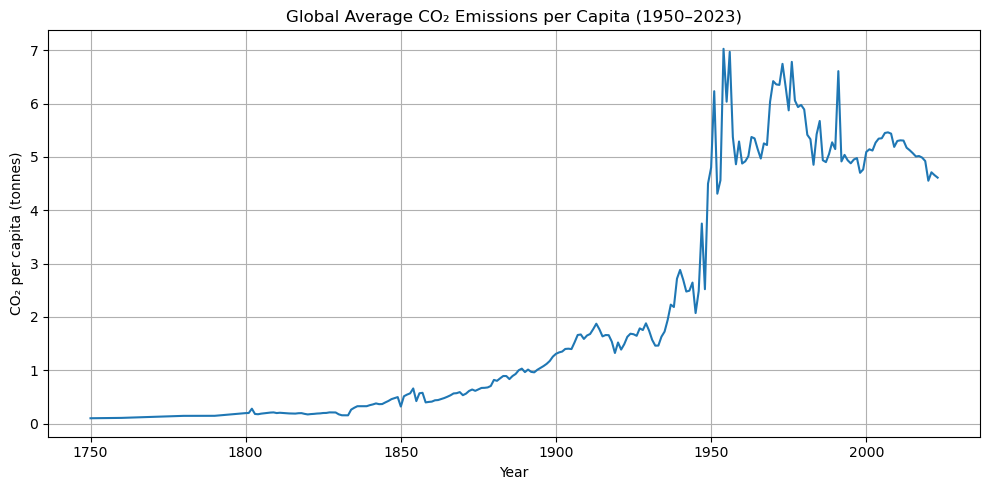

In [10]:
global_co2 = co2_long.groupby('Year')['CO2_per_capita'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=global_co2, x='Year', y='CO2_per_capita')
plt.title('Global Average CO₂ Emissions per Capita (1950–2023)')
plt.ylabel('CO₂ per capita (tonnes)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 7.2. Top 10 quốc gia phát thải CO₂ bình quân đầu người năm 2023


In [22]:
top10_2023 = co2_2023.sort_values('CO2_per_capita', ascending=False).head(10)
fig1 = px.bar(top10_2023, x='Entity', y='CO2_per_capita', color='CO2_per_capita',
             title='Top 10 Countries by CO₂ Emissions per Capita (2023)',
             labels={'CO2_per_capita':'CO₂ per capita (tonnes)'})
fig1.show()

##### 7.3. Bản đồ bất thường nhiệt độ toàn cầu (3/2025)


In [12]:
fig2 = px.scatter_geo(temp_2025, lat='Latitude', lon='Longitude', color='Anomaly',
                    color_continuous_scale='RdBu_r',
                    title='Global Temperature Anomaly (March 2025)',
                    projection='natural earth')
fig2.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig2.show()

##### 7.4. So sánh phát thải CO₂ và nhiệt độ theo khu vực


In [16]:
temp_2025['Lat_band'] = pd.cut(temp_2025['Latitude'], bins=np.arange(-90, 100, 30))
lat_anomaly = temp_2025.groupby('Lat_band')['Anomaly'].mean().reset_index()

print(lat_anomaly)

     Lat_band   Anomaly
0  (-90, -60] -0.001667
1  (-60, -30]  0.447338
2    (-30, 0]  0.507940
3     (0, 30]  0.514745
4    (30, 60]  1.016782
5    (60, 90]  2.289051


In [17]:
continents = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']
co2_continent = co2_long[co2_long['Entity'].isin(continents) & (co2_long['Year']==2023)]

print(co2_continent)

              Entity  Year  CO2_per_capita
214           Africa  2023        0.959257
1274            Asia  2023        4.731389
7844          Europe  2023        6.688105
17324  North America  2023       10.128150
18250        Oceania  2023        9.498823
21785  South America  2023        2.562797


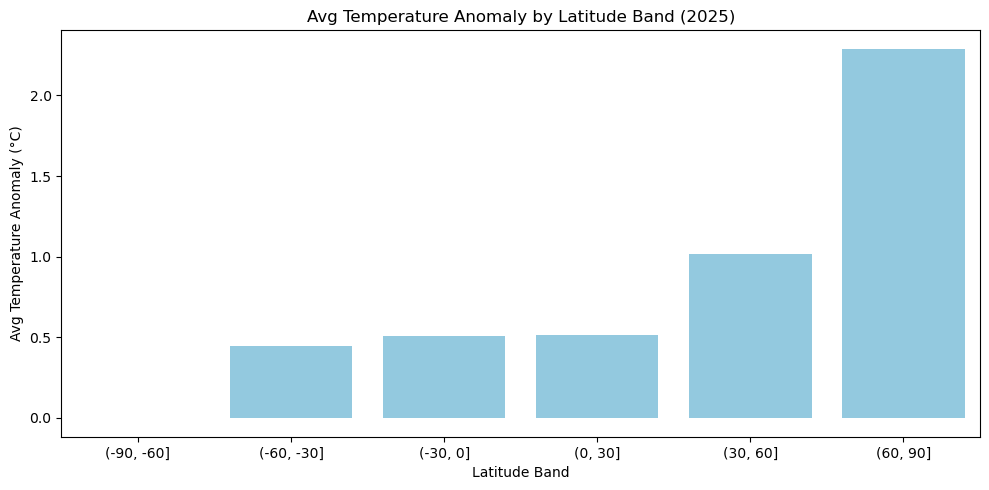

In [18]:
fig, ax1 = plt.subplots(figsize=(10,5))
sns.barplot(data=lat_anomaly, x='Lat_band', y='Anomaly', ax=ax1, color='skyblue')
ax1.set_ylabel('Avg Temperature Anomaly (°C)')
ax1.set_xlabel('Latitude Band')
ax1.set_title('Avg Temperature Anomaly by Latitude Band (2025)')
plt.tight_layout()
plt.show()

In [19]:
fig3 = px.bar(co2_continent, x='Entity', y='CO2_per_capita',
             title='CO₂ Emissions per Capita by Continent (2023)',
             labels={'CO2_per_capita':'CO₂ per capita (tonnes)'})
fig3.show()

##### 7.5. Tương tác: Xem xu hướng phát thải CO₂ theo quốc gia


In [20]:
def plot_country_co2(country):
    data = co2_long[co2_long['Entity'] == country]
    plt.figure(figsize=(8,4))
    plt.plot(data['Year'], data['CO2_per_capita'], marker='o')
    plt.title(f'CO₂ Emissions per Capita in {country} (1949–2023)')
    plt.xlabel('Year')
    plt.ylabel('CO₂ per capita (tonnes)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [21]:
interact(plot_country_co2, country=co2_long['Entity'].unique())

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Africa', 'Albania', 'Algeria', …

<function __main__.plot_country_co2(country)>

#### 8. Kết luận
- Phát thải CO₂ bình quân đầu người toàn cầu tăng mạnh trong 70 năm qua, với sự khác biệt lớn giữa các khu vực.
- Nhiệt độ bất thường năm 2025 cho thấy sự nóng lên rõ rệt ở nhiều vĩ độ cao.
- Các quốc gia phát thải cao thường không đông dân nhất nhưng đóng góp lớn vào biến đổi khí hậu.
- Trực quan hóa dữ liệu giúp nhận diện các xu hướng và thúc đẩy hành động khí hậu.
